In [1]:
import sys
sys.path.append("/home/daniel/repos/roaddamage/")

In [2]:
from ultralytics import YOLO
import ipywidgets as widgets
import glob
import cv2
from skimage import io

In [3]:
%matplotlib widget

In [4]:
pwd

'/home/daniel/repos/roaddamage/src/notebooks'

In [5]:
@widgets.interactive
def get_model(p = glob.glob("/home/daniel/repos/roaddamage/runs/**/**.pt", recursive = True)):
    model = YOLO(p)
    return model

get_model

interactive(children=(Dropdown(description='p', options=('/home/daniel/repos/roaddamage/runs/detect/train4/wei…

In [6]:
m = get_model.result

In [7]:
images = glob.glob("/home/daniel/repos/roaddamage/datasets/val/images/**.jpg")

In [8]:
rs = m(images[:10])


0: 640x640 (no detections), 69.6ms
1: 640x640 (no detections), 69.6ms
2: 640x640 1 D00, 69.6ms
3: 640x640 (no detections), 69.6ms
4: 640x640 (no detections), 69.6ms
5: 640x640 (no detections), 69.6ms
6: 640x640 (no detections), 69.6ms
7: 640x640 3 D00s, 69.6ms
8: 640x640 (no detections), 69.6ms
9: 640x640 (no detections), 69.6ms
Speed: 3.2ms preprocess, 69.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [9]:
def draw_annotations(ann):
    cmap = {"D00": (255,0,0), "D10": (0,255,0), "D20":(0,0,255), "D40": (255,0,255)}
    img = ann.orig_img.copy()
    for xyxy, c in zip(ann.boxes.xyxy, ann.boxes.cls):
        clsname = ann.names[int(c)]
        color = cmap[clsname]
        xmin, ymin, xmax, ymax = [int(n) for n in xyxy]
        print(xmin, ymin, xmax, ymax)
        img = cv2.rectangle(img,  (xmin, ymin), (xmax, ymax), color, 4)
        img = cv2.putText(img, clsname, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color,3)
    return img   

def draw_xml_annotations(img, annotations):
    cmap = {"D00": (255,0,0), "D10": (0,255,0), "D20":(0,0,255), "D40": (255,0,255)}
    for annotation in annotations["objects"]:
        xmin = annotation["coords"]["xmin"]
        ymin = annotation["coords"]["ymin"]
        xmax = annotation["coords"]["xmax"]
        ymax = annotation["coords"]["ymax"]
        img = cv2.rectangle(img,  (xmin, ymin), (xmax, ymax), cmap[annotation["class"]], 4)
        img = cv2.putText(img, annotation["class"], (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, cmap[annotation["class"]],3)
    return img
    

In [10]:
img = draw_annotations(rs[7])

1702 1807 1987 2044
1505 1843 1592 2044
1500 1856 1574 2044


In [11]:
rs[7].boxes.xyxy

tensor([[1702.3558, 1807.2159, 1987.4567, 2044.0000],
        [1505.6141, 1843.7544, 1592.2638, 2044.0000],
        [1500.8420, 1856.2286, 1574.1198, 2044.0000]])

In [12]:

rs[7].names[0]

'D00'

In [13]:
from src.utils.utils import get_simplified_annotation_for_image

In [14]:
sa = get_simplified_annotation_for_image(images[8])

In [24]:
img1 = draw_annotations(rs[8])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = draw_xml_annotations(rs[8].orig_img.copy(), sa)
img2 = img1 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [25]:
import matplotlib.pyplot as plt

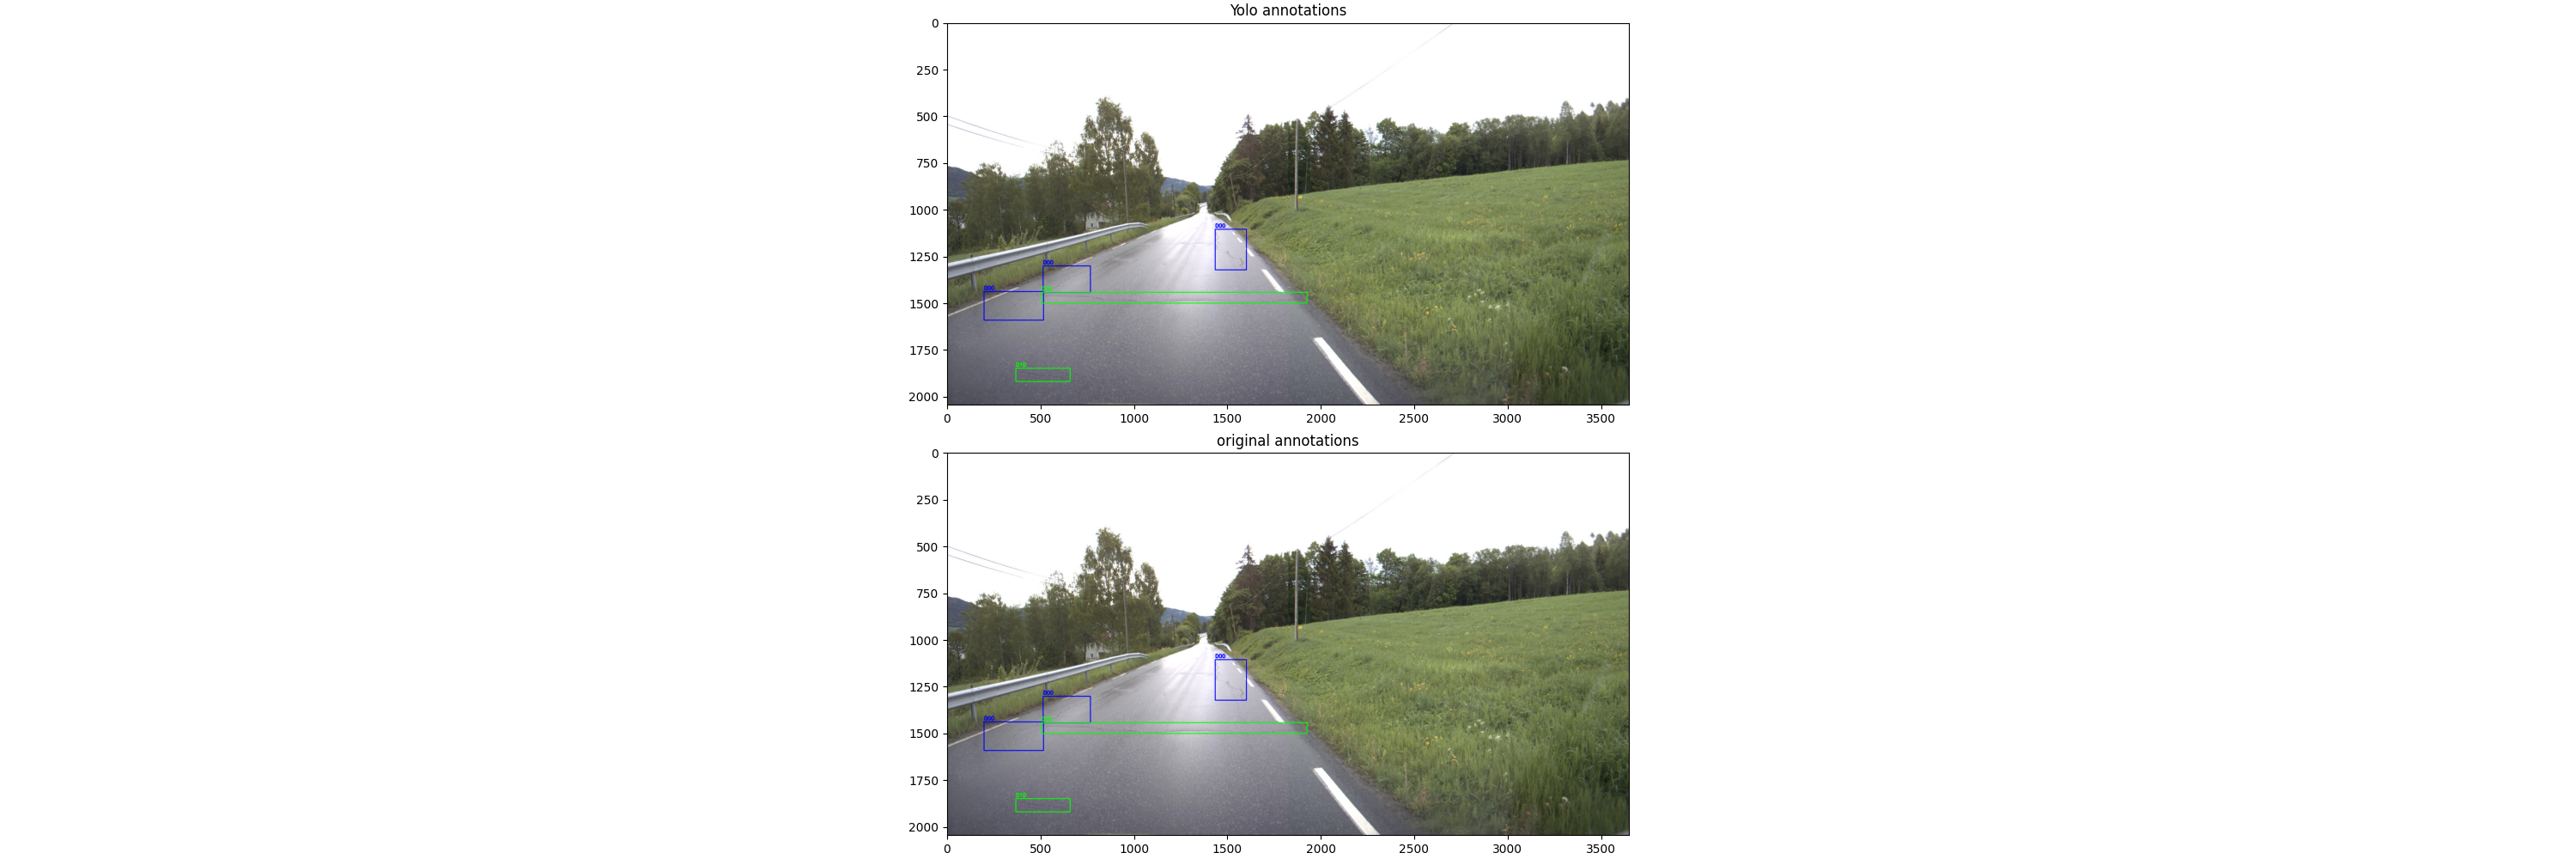

In [26]:
fig, axes = plt.subplots(2,1, figsize = (30,10), constrained_layout = True)
imshow1 = axes[0].imshow(img1)
axes[0].set_title("Yolo annotations")
imshow2 = axes[1].imshow(img2)
axes[1].set_title("original annotations");


In [28]:
@widgets.interact
def compare_model(img_path = images, m = glob.glob("/home/daniel/repos/roaddamage/runs/**/**.pt", recursive = True)):
    m = YOLO(m)
    rs = m(img_path)[0]
    sa = get_simplified_annotation_for_image(img_path)
    img1 = draw_annotations(rs)
    img2 = draw_xml_annotations(rs.orig_img.copy(), sa)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    imshow1.set_data(img1)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    imshow2.set_data(img2)
    fig.canvas.draw()

interactive(children=(Dropdown(description='img_path', options=('/home/daniel/repos/roaddamage/datasets/val/im…